In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
import seaborn as sn
from tabulate import tabulate

In [40]:
#consts

filename= 'amzn_28_01_2021 19_06_52.csv'

In [41]:
# functions

def calculate_jaccard_score(test_y, predict):
    return jaccard_score(test_y, predict, average="macro")

def print_conf_matrix(test_y, predict, name):
    matrix = confusion_matrix(test_y, predict,  labels=[-1, 0, 1])
    print(matrix)
    ax= plt.subplot()
    sn.heatmap(matrix, annot=True, ax = ax) #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels', color='white')
    ax.set_ylabel('True labels', color='white')
    ax.set_title(f'Confusion Matrix for {name}' , color='white')
    ax.xaxis.set_ticklabels(['-1','0', '1'], color='white')
    ax.yaxis.set_ticklabels(['-1','0', '1'], color='white')
    plt.show()

def train_model(model,train_x, train_y):
    model.fit(train_x, train_y)

In [42]:
df = pd.read_csv(f'../data/preprocess/{filename}')

df.head(10)

,Date,Time,Open,High,Low,Close,Volume,Close_diff,h_l_diff,o_c_diff,...,o_c_diff_8,o_c_diff_9,o_c_diff_10,Open_daily_mean,High_daily_mean,Low_daily_mean,Close_daily_mean,h_l_diff_daily_mean,o_c_diff_daily_mean,class_column
0,2017-05-17,19:00:00,955.6816,958.88,953.5200,957.5690,260780,1.8290,5.3600,-1.8874,...,-1.1324,0.0726,1.7826,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125,1
1,2017-05-17,20:00:00,957.6300,958.30,953.5200,953.7801,181523,-3.7889,4.7800,3.8499,...,4.7244,4.6049,5.8099,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125,-1
2,2017-05-17,21:00:00,953.7100,955.55,948.1000,948.2900,467770,-5.4901,7.4500,5.4200,...,3.1768,6.2945,6.1750,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125,-1
3,2017-05-17,22:00:00,948.6400,949.73,944.1200,944.7900,1090407,-3.5000,5.6100,3.8500,...,5.0250,1.6068,4.7245,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125,-1
4,2017-05-18,16:00:00,944.8000,955.00,944.7600,951.8450,650889,7.0550,10.2400,-7.0450,...,-7.9550,-5.8700,-9.2882,954.239957,958.761429,953.149557,956.109600,5.611871,-1.869643,1
5,2017-05-18,17:00:00,951.8700,959.66,951.7000,955.2100,543846,3.3650,7.9600,-3.3400,...,-1.1600,-4.2500,-2.1650,954.239957,958.761429,953.149557,956.109600,5.611871,-1.869643,1
6,2017-05-18,18:00:00,955.3800,957.78,954.0200,954.3600,212850,-0.8500,3.7600,1.0200,...,-3.6600,3.2000,0.1100,954.239957,958.761429,953.149557,956.109600,5.611871,-1.869643,-1
7,2017-05-18,19:00:00,954.5245,956.00,951.2069,955.4300,295354,1.0700,4.7931,-0.9055,...,1.9045,-5.5855,1.2745,954.239957,958.761429,953.149557,956.109600,5.611871,-1.869643,1
8,2017-05-18,20:00:00,955.4502,959.04,954.4600,957.7500,158194,2.3200,4.5800,-2.2998,...,-0.4124,0.5102,-6.9798,954.239957,958.761429,953.149557,956.109600,5.611871,-1.869643,1
9,2017-05-18,21:00:00,957.9000,962.75,957.9000,960.0222,413588,2.2722,4.8500,-2.1222,...,-5.9721,-0.2348,0.6878,954.239957,958.761429,953.149557,956.109600,5.611871,-1.869643,1


In [43]:
# sort
df = df.sort_values(by=['Date'])
df

,Date,Time,Open,High,Low,Close,Volume,Close_diff,h_l_diff,o_c_diff,...,o_c_diff_8,o_c_diff_9,o_c_diff_10,Open_daily_mean,High_daily_mean,Low_daily_mean,Close_daily_mean,h_l_diff_daily_mean,o_c_diff_daily_mean,class_column
0,2017-05-17,19:00:00,955.6816,958.8800,953.52,957.5690,260780,1.8290,5.3600,-1.8874,...,-1.1324,0.0726,1.7826,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125,1
1,2017-05-17,20:00:00,957.6300,958.3000,953.52,953.7801,181523,-3.7889,4.7800,3.8499,...,4.7244,4.6049,5.8099,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125,-1
2,2017-05-17,21:00:00,953.7100,955.5500,948.10,948.2900,467770,-5.4901,7.4500,5.4200,...,3.1768,6.2945,6.1750,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125,-1
3,2017-05-17,22:00:00,948.6400,949.7300,944.12,944.7900,1090407,-3.5000,5.6100,3.8500,...,5.0250,1.6068,4.7245,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125,-1
4,2017-05-18,16:00:00,944.8000,955.0000,944.76,951.8450,650889,7.0550,10.2400,-7.0450,...,-7.9550,-5.8700,-9.2882,954.239957,958.761429,953.149557,956.109600,5.611871,-1.869643,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,2017-12-06,17:00:00,1146.4846,1153.1000,1140.82,1152.5096,328655,6.2996,12.2800,-6.0250,...,11.0000,-7.7333,-20.0298,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257,1
981,2017-12-06,18:00:00,1152.3703,1153.2000,1146.50,1149.9350,195757,-2.5746,6.7000,2.4353,...,9.6653,19.4603,0.7270,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257,-1
982,2017-12-06,19:00:00,1150.0000,1150.1900,1144.00,1145.1000,134232,-4.8350,6.1900,4.9000,...,1.6835,12.1300,21.9250,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257,-1
983,2017-12-06,20:00:00,1145.0000,1150.6833,1143.01,1150.6833,147776,5.5833,7.6733,-5.6833,...,-8.6033,-8.8998,1.5467,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257,1


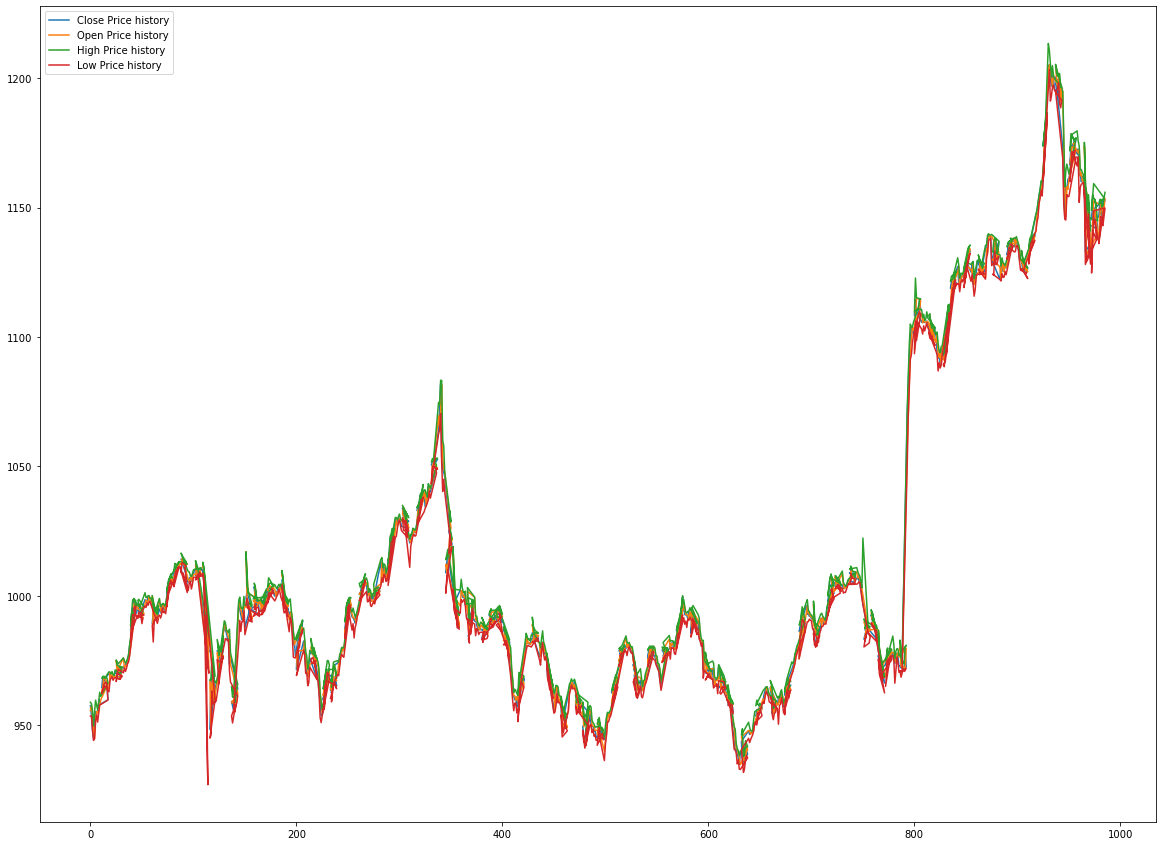

In [44]:
plt.figure(figsize=(20,15))
plt.plot(df['Close'], label='Close Price history')
plt.plot(df['Open'], label='Open Price history')
plt.plot(df['High'], label='High Price history')
plt.plot(df['Low'], label='Low Price history')
plt.legend()

In [45]:
# get last date
# df.sort('Date')['Date'].value_counts()
last_day = df.sort_values(by=['Date'])[-1:]['Date'].iloc[-1]
# last_day = '2017-05-18'

train_set = df[df['Date'] != last_day].copy()
test_set = df[df['Date']  == last_day].copy()

In [46]:
train_set = train_set.drop(['Date','Time'],1)
train_set

,Open,High,Low,Close,Volume,Close_diff,h_l_diff,o_c_diff,Open_1,Open_2,...,o_c_diff_8,o_c_diff_9,o_c_diff_10,Open_daily_mean,High_daily_mean,Low_daily_mean,Close_daily_mean,h_l_diff_daily_mean,o_c_diff_daily_mean,class_column
0,955.6816,958.880,953.520,957.5690,260780,1.8290,5.360,-1.8874,2.7516,-1.7384,...,-1.1324,0.0726,1.7826,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125,1
1,957.6300,958.300,953.520,953.7801,181523,-3.7889,4.780,3.8499,1.9484,4.7000,...,4.7244,4.6049,5.8099,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125,-1
2,953.7100,955.550,948.100,948.2900,467770,-5.4901,7.450,5.4200,-3.9200,-1.9716,...,3.1768,6.2945,6.1750,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125,-1
3,948.6400,949.730,944.120,944.7900,1090407,-3.5000,5.610,3.8500,-5.0700,-8.9900,...,5.0250,1.6068,4.7245,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125,-1
4,944.8000,955.000,944.760,951.8450,650889,7.0550,10.240,-7.0450,-3.8400,-8.9100,...,-7.9550,-5.8700,-9.2882,954.239957,958.761429,953.149557,956.109600,5.611871,-1.869643,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,1149.2500,1153.270,1145.345,1146.3300,281411,-2.9835,7.925,2.9200,-3.2800,4.2400,...,15.0447,-22.5800,-13.0055,1144.247186,1151.872557,1139.835714,1146.215514,12.036843,-1.968329,-1
977,1148.9100,1150.360,1137.340,1140.1800,268163,-8.4101,13.020,8.7300,2.8997,-0.3400,...,8.0000,14.2490,20.8547,1144.247186,1151.872557,1139.835714,1146.215514,12.036843,-1.968329,-1
973,1145.0100,1154.958,1141.090,1152.2400,592919,6.9550,13.868,-7.2300,16.7500,9.3517,...,-23.1555,-5.7600,-6.6050,1144.247186,1151.872557,1139.835714,1146.215514,12.036843,-1.968329,1
972,1128.2600,1148.990,1124.740,1145.2850,663229,11.3350,24.250,-17.0250,-7.3983,-21.4048,...,-15.5550,-16.4000,-20.3153,1144.247186,1151.872557,1139.835714,1146.215514,12.036843,-1.968329,1


In [47]:
test_set = test_set.drop(['Date','Time'],1)
test_set

,Open,High,Low,Close,Volume,Close_diff,h_l_diff,o_c_diff,Open_1,Open_2,...,o_c_diff_8,o_c_diff_9,o_c_diff_10,Open_daily_mean,High_daily_mean,Low_daily_mean,Close_daily_mean,h_l_diff_daily_mean,o_c_diff_daily_mean,class_column
984,1150.3300,1153.8000,1149.8453,1153.1900,175837,2.5067,3.9547,-2.8600,5.3300,0.3300,...,-0.2802,-5.7800,-6.0765,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257,1
979,1137.9900,1151.1700,1136.0800,1146.2100,423518,4.6400,15.0900,-8.2200,-1.7700,-10.9200,...,-9.9283,-22.2248,-8.9500,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257,1
980,1146.4846,1153.1000,1140.8200,1152.5096,328655,6.2996,12.2800,-6.0250,8.4946,6.7246,...,11.0000,-7.7333,-20.0298,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257,1
981,1152.3703,1153.2000,1146.5000,1149.9350,195757,-2.5746,6.7000,2.4353,5.8857,14.3803,...,9.6653,19.4603,0.7270,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257,-1
982,1150.0000,1150.1900,1144.0000,1145.1000,134232,-4.8350,6.1900,4.9000,-2.3703,3.5154,...,1.6835,12.1300,21.9250,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257,-1
983,1145.0000,1150.6833,1143.0100,1150.6833,147776,5.5833,7.6733,-5.6833,-5.0000,-7.3703,...,-8.6033,-8.8998,1.5467,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257,1
985,1153.4400,1155.8900,1149.7000,1152.9408,411083,-0.2492,6.1900,0.4992,3.1100,8.4400,...,-8.2308,3.0790,-2.4208,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257,-1


In [48]:
train_x = train_set.drop(['class_column'],1)
train_y = train_set['class_column']
train_x

,Open,High,Low,Close,Volume,Close_diff,h_l_diff,o_c_diff,Open_1,Open_2,...,o_c_diff_7,o_c_diff_8,o_c_diff_9,o_c_diff_10,Open_daily_mean,High_daily_mean,Low_daily_mean,Close_daily_mean,h_l_diff_daily_mean,o_c_diff_daily_mean
0,955.6816,958.880,953.520,957.5690,260780,1.8290,5.360,-1.8874,2.7516,-1.7384,...,-1.0129,-1.1324,0.0726,1.7826,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125
1,957.6300,958.300,953.520,953.7801,181523,-3.7889,4.780,3.8499,1.9484,4.7000,...,1.6067,4.7244,4.6049,5.8099,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125
2,953.7100,955.550,948.100,948.2900,467770,-5.4901,7.450,5.4200,-3.9200,-1.9716,...,6.5950,3.1768,6.2945,6.1750,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125
3,948.6400,949.730,944.120,944.7900,1090407,-3.5000,5.610,3.8500,-5.0700,-8.9900,...,2.9400,5.0250,1.6068,4.7245,953.915400,955.615000,949.815000,951.107275,5.800000,2.808125
4,944.8000,955.000,944.760,951.8450,650889,7.0550,10.240,-7.0450,-3.8400,-8.9100,...,-4.8650,-7.9550,-5.8700,-9.2882,954.239957,958.761429,953.149557,956.109600,5.611871,-1.869643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,1149.2500,1153.270,1145.345,1146.3300,281411,-2.9835,7.925,2.9200,-3.2800,4.2400,...,8.4390,15.0447,-22.5800,-13.0055,1144.247186,1151.872557,1139.835714,1146.215514,12.036843,-1.968329
977,1148.9100,1150.360,1137.340,1140.1800,268163,-8.4101,13.020,8.7300,2.8997,-0.3400,...,-5.2748,8.0000,14.2490,20.8547,1144.247186,1151.872557,1139.835714,1146.215514,12.036843,-1.968329
973,1145.0100,1154.958,1141.090,1152.2400,592919,6.9550,13.868,-7.2300,16.7500,9.3517,...,-32.7300,-23.1555,-5.7600,-6.6050,1144.247186,1151.872557,1139.835714,1146.215514,12.036843,-1.968329
972,1128.2600,1148.990,1124.740,1145.2850,663229,11.3350,24.250,-17.0250,-7.3983,-21.4048,...,-32.9505,-15.5550,-16.4000,-20.3153,1144.247186,1151.872557,1139.835714,1146.215514,12.036843,-1.968329


In [49]:
train_y

0      1
1     -1
2     -1
3     -1
4      1
      ..
975   -1
977   -1
973    1
972    1
974   -1
Name: class_column, Length: 979, dtype: int64

In [50]:
test_x = test_set.drop(['class_column'],1)
test_y = test_set['class_column']
test_x

,Open,High,Low,Close,Volume,Close_diff,h_l_diff,o_c_diff,Open_1,Open_2,...,o_c_diff_7,o_c_diff_8,o_c_diff_9,o_c_diff_10,Open_daily_mean,High_daily_mean,Low_daily_mean,Close_daily_mean,h_l_diff_daily_mean,o_c_diff_daily_mean
984,1150.3300,1153.8000,1149.8453,1153.1900,175837,2.5067,3.9547,-2.8600,5.3300,0.3300,...,-11.5900,-0.2802,-5.7800,-6.0765,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257
979,1137.9900,1151.1700,1136.0800,1146.2100,423518,4.6400,15.0900,-8.2200,-1.7700,-10.9200,...,8.8050,-9.9283,-22.2248,-8.9500,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257
980,1146.4846,1153.1000,1140.8200,1152.5096,328655,6.2996,12.2800,-6.0250,8.4946,6.7246,...,1.2050,11.0000,-7.7333,-20.0298,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257
981,1152.3703,1153.2000,1146.5000,1149.9350,195757,-2.5746,6.7000,2.4353,5.8857,14.3803,...,-0.7812,9.6653,19.4603,0.7270,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257
982,1150.0000,1150.1900,1144.0000,1145.1000,134232,-4.8350,6.1900,4.9000,-2.3703,3.5154,...,1.9800,1.6835,12.1300,21.9250,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257
983,1145.0000,1150.6833,1143.0100,1150.6833,147776,5.5833,7.6733,-5.6833,-5.0000,-7.3703,...,-3.1035,-8.6033,-8.8998,1.5467,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257
985,1153.4400,1155.8900,1149.7000,1152.9408,411083,-0.2492,6.1900,0.4992,3.1100,8.4400,...,2.3092,-8.2308,3.0790,-2.4208,1147.944986,1152.576186,1144.279329,1150.081243,8.296857,-2.136257


In [51]:
test_y


984    1
979    1
980    1
981   -1
982   -1
983    1
985   -1
Name: class_column, dtype: int64

In [52]:
classifiers = dict()
classifiers['RandomForestClassifier 1'] = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0,criterion='gini')
# classifiers['RandomForestClassifier 2'] = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0,criterion='gini')
# classifiers['RandomForestClassifier 3'] = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0,criterion='gini')
# classifiers['RandomForestClassifier 4'] = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=0,criterion='gini')
# classifiers['RandomForestClassifier 5'] = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0,criterion='entropy')
# classifiers['RandomForestClassifier 6'] = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0,criterion='entropy')
# classifiers['RandomForestClassifier 7'] = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0,criterion='entropy')
# classifiers['RandomForestClassifier 8'] = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=0,criterion='entropy')
#
# classifiers['DecisionTreeClassifier 1'] = DecisionTreeClassifier(max_depth=10, random_state=0,criterion='gini',splitter='best')
# classifiers['DecisionTreeClassifier 2'] = DecisionTreeClassifier(max_depth=10, random_state=0,criterion='gini',splitter='random')
# classifiers['DecisionTreeClassifier 3'] = DecisionTreeClassifier(max_depth=10, random_state=0,criterion='entropy',splitter='best')
# classifiers['DecisionTreeClassifier 4'] = DecisionTreeClassifier(max_depth=10, random_state=0,criterion='entropy',splitter='random')
# classifiers['DecisionTreeClassifier 5'] = DecisionTreeClassifier(random_state=0,criterion='gini',splitter='best')
# classifiers['DecisionTreeClassifier 6'] = DecisionTreeClassifier(random_state=0,criterion='gini',splitter='random')
# classifiers['DecisionTreeClassifier 7'] = DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
# classifiers['DecisionTreeClassifier 8'] = DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='random')
#
# classifiers['GradientBoostingClassifier 1'] = GradientBoostingClassifier(n_estimators=100,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.1)
# classifiers['GradientBoostingClassifier 2'] = GradientBoostingClassifier(n_estimators=100,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.3)
# classifiers['GradientBoostingClassifier 3'] = GradientBoostingClassifier(n_estimators=100,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.5)
# classifiers['GradientBoostingClassifier 4'] = GradientBoostingClassifier(n_estimators=100,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=1)
#
# classifiers['GradientBoostingClassifier 5'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.1)
# classifiers['GradientBoostingClassifier 6'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.3)
# classifiers['GradientBoostingClassifier 7'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.5)
# classifiers['GradientBoostingClassifier 8'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=1)
#
# classifiers['GradientBoostingClassifier 9'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=2, learning_rate=0.1)
# classifiers['GradientBoostingClassifier 10'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=2, learning_rate=0.3)
# classifiers['GradientBoostingClassifier 11'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=2, learning_rate=0.5)
# classifiers['GradientBoostingClassifier 12'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=2, learning_rate=1)


[[3 0 0]
 [0 0 0]
 [0 0 4]]
+----+--------------------------+-----------------+
|    | Classifier type          |   jaccard score |
|----+--------------------------+-----------------|
|  0 | RandomForestClassifier 1 |               1 |
+----+--------------------------+-----------------+


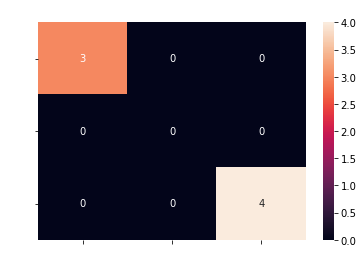

In [53]:
predictions= dict()
score = dict()

for k,v in classifiers.items():
    train_model(v,train_x,train_y)
    predictions[k] = v.predict(test_x)
    score[k] = calculate_jaccard_score(test_y, predictions[k])
    print_conf_matrix(test_y, predictions[k], k)

headers = ["Classifier type", "jaccard score"]
score_df = pd.DataFrame(score.items(), columns=headers)
print(tabulate(score_df, headers, tablefmt="psql"))

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.15329948e-01, 6.02148458e-04, 1.44033431e-01,
       0.00000000e+00, 1.22570987e-03, 5.20561601e-04, 1.61196658e-04,
       0.00000000e+00, 5.85082181e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.85815704e-02, 8.87427645e-04,
       3.41579470e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.36983224e-02, 5.43582222e-03, 1.38919019e-03, 2.94658094e-03,
       0.00000000e+00, 0.00000000e+00, 1.86285507e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.10383072e-01, 2.86613452e-02,
       7.84546376e-03, 2.58523677e-03, 1.33040346e-03, 6.91519736e-04,
       3.12164343e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.29250316e-05, 0.00000000e+00, 0.00000000e+00, 3.11400468e-04,
       0.00000000e+00, 1.72115222e-04, 9.54419994e-05, 6.62081388e-05,
      

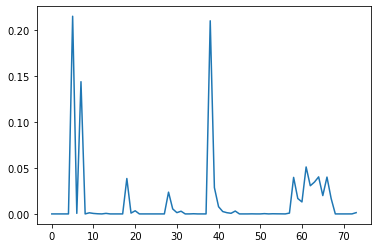

In [55]:
pd.Series(classifiers['RandomForestClassifier 1'].feature_importances_).plot()
classifiers['RandomForestClassifier 1'].feature_importances_